# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
%matplotlib inline

# Load Data

In [3]:
def load_data(file_path):
    """
    Load data and map Sex column to numerics
    """
    df = pd.read_csv(file_path)
    
    sex_mapping = {"male": 0, "female": 1}
    df['Sex'] = df['Sex'].map(sex_mapping)
    
    return df
    
    

In [4]:
df_train = load_data('train.csv')

In [5]:
df_test = load_data('test.csv')

# Data Exploration

In [6]:
df_train_exploration = df_train.copy()

In [7]:
df_train_exploration.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
519,520,0,3,"Pavlovic, Mr. Stefo",0,32.0,0,0,349242,7.8958,NaN,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,B69,S
800,801,0,2,"Ponesell, Mr. Martin",0,34.0,0,0,250647,13.0000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",0,32.0,0,0,350417,7.8542,NaN,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",1,NaN,1,0,PC 17604,82.1708,NaN,C


In [8]:
df_train_exploration.shape

(891, 12)

In [9]:
df_train_exploration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [10]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,1102,3,"Andersen, Mr. Albert Karvin",0,32.0,0,0,C 4001,22.5250,NaN,S
134,1026,3,"Dintcheff, Mr. Valtcho",0,43.0,0,0,349226,7.8958,NaN,S
155,1047,3,"Duquemin, Mr. Joseph",0,24.0,0,0,S.O./P.P. 752,7.5500,NaN,S
171,1063,3,"Zakarian, Mr. Ortin",0,27.0,0,0,2670,7.2250,NaN,C
277,1169,2,"Faunthorpe, Mr. Harry",0,40.0,1,0,2926,26.0000,NaN,S


In [11]:
df_test.shape

(418, 11)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


### Age

In [13]:
df_train_exploration['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
df_train_exploration['LogAge'] = np.log(df_train_exploration['Age'].replace(0, np.nan))

In [15]:
df_train_exploration['AgeBinned'] = pd.cut(df_train_exploration['Age'], 
                               [0, 2, 15, 35, 60, 200], 
                               labels=['infant_0-2', 'child_2-15', 'young adult_15-35','adult_35-60','elderly_over_60'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

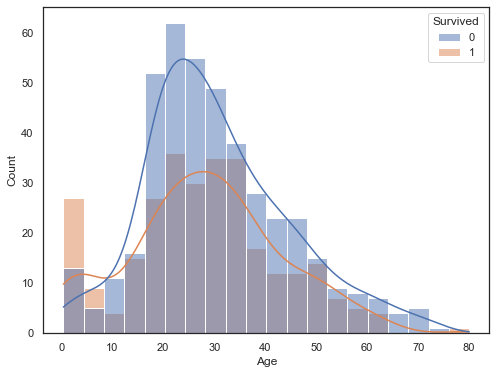

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Age',hue ='Survived', kde=True, data=df_train_exploration)

<AxesSubplot:xlabel='LogAge', ylabel='Count'>

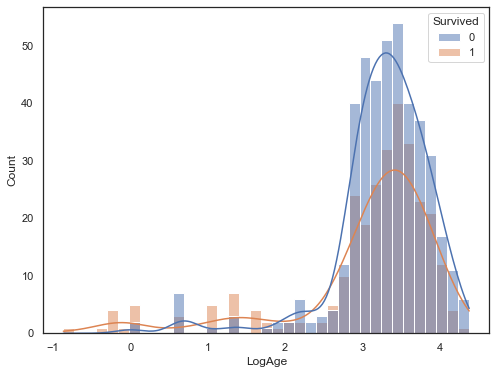

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(x='LogAge',hue ='Survived', kde=True, data=df_train_exploration)

<AxesSubplot:xlabel='AgeBinned', ylabel='count'>

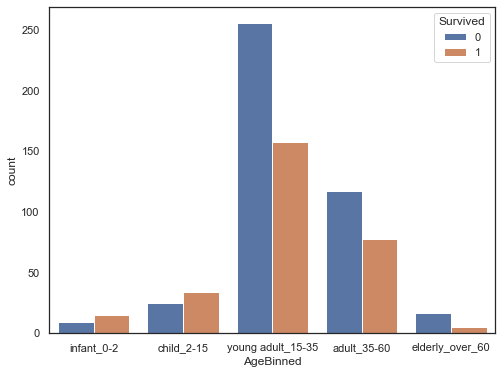

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeBinned', hue='Survived', data=df_train_exploration)

In [19]:
df_train_exploration_corr = df_train_exploration.corr().abs().unstack().sort_values(ascending=False).reset_index()
df_train_exploration_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

In [20]:
df_train_exploration_corr[df_train_exploration_corr['Feature 1'] == 'Age']


,Feature 1,Feature 2,Correlation Coefficient
7,Age,Age,1.000000
10,Age,LogAge,0.850933
20,Age,Pclass,0.369226
23,Age,SibSp,0.308247
36,Age,Parch,0.189119
48,Age,Fare,0.096067
49,Age,Sex,0.093254
56,Age,Survived,0.077221
65,Age,PassengerId,0.036847


## Fare

In [21]:
df_train_exploration['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
df_train_exploration['LogFare'] = np.log(df_train_exploration['Fare'].replace(0, np.nan))

In [23]:
df_train_exploration['FareBinned'] = pd.cut(df_train_exploration['Fare'], 
                               [0, 10, 50, 100, 1000], 
                                labels=['fare_0-10', 'fare_10-50', 'fare_50-100','fare_100-1000']
                               )

<AxesSubplot:xlabel='Fare', ylabel='Count'>

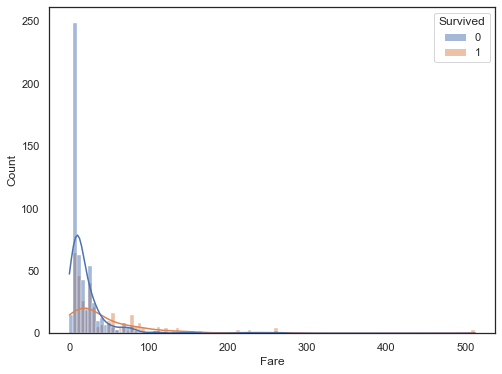

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Fare',hue ='Survived', kde=True, data=df_train_exploration)

<AxesSubplot:xlabel='LogFare', ylabel='Count'>

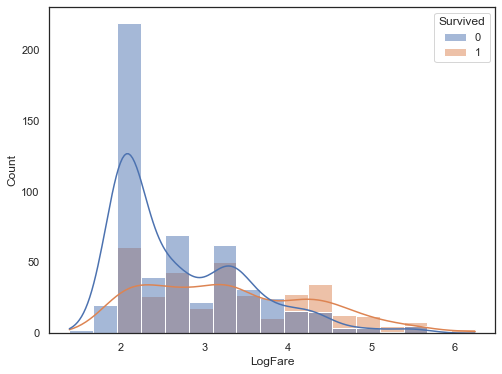

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(x='LogFare',hue ='Survived', kde=True, data=df_train_exploration)

<AxesSubplot:xlabel='FareBinned', ylabel='count'>

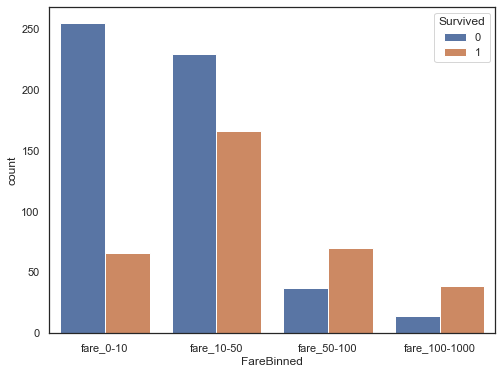

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FareBinned', hue='Survived', data=df_train_exploration)

## Cabin

In [27]:
df_train_exploration['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [28]:
df_train_exploration['Deck']=df_train_exploration['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else np.NaN)

In [29]:
df_train_exploration['Deck'].describe()

count     204
unique      8
top         C
freq       59
Name: Deck, dtype: object

In [30]:
df_train_exploration[df_train_exploration['Survived']==1].groupby('Deck')['Survived'].count().reset_index()

,Deck,Survived
0,A,7
1,B,35
2,C,35
3,D,25
4,E,24
5,F,8
6,G,2


In [31]:
total = df_train_exploration.groupby('Deck')['Survived'].count().reset_index()
survived = df_train_exploration[df_train_exploration['Survived']==1].groupby('Deck')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]

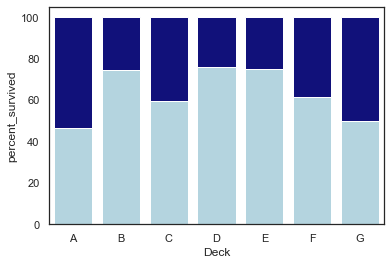

In [32]:
total = df_train_exploration.groupby('Deck')['Survived'].count().reset_index()
survived = df_train_exploration[df_train_exploration['Survived']==1].groupby('Deck')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]
total['percent_survived'] = [i / j * 100 for i,j in zip(total['Survived'], total['Survived'])]

bar1 = sns.barplot(x="Deck",  y="percent_survived", data=total, color='darkblue')
bar2 = sns.barplot(x="Deck", y="percent_survived", data=survived, color='lightblue')

## Sibsp & Parch

In [33]:
total = df_train_exploration.groupby('SibSp')['Survived'].count().reset_index()
survived = df_train_exploration[df_train_exploration['Survived']==1].groupby('SibSp')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]

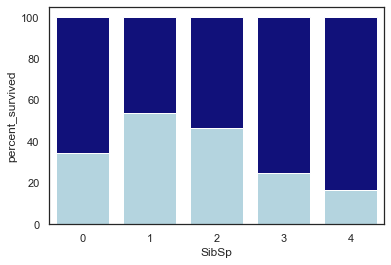

In [34]:
total = df_train_exploration.groupby('SibSp')['Survived'].count().reset_index()
survived = df_train_exploration[df_train_exploration['Survived']==1].groupby('SibSp')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]
total['percent_survived'] = [i / j * 100 for i,j in zip(total['Survived'], total['Survived'])]

bar1 = sns.barplot(x="SibSp",  y="percent_survived", data=total, color='darkblue')
bar2 = sns.barplot(x="SibSp", y="percent_survived", data=survived, color='lightblue')

In [35]:
total = df_train_exploration.groupby('Parch')['Survived'].count().reset_index()
survived = df_train_exploration[df_train_exploration['Survived']==1].groupby('Parch')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]

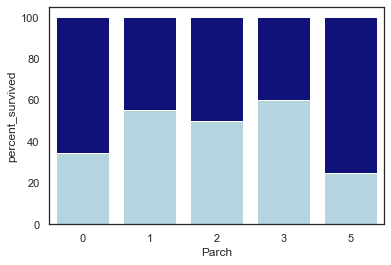

In [36]:
total = df_train_exploration.groupby('Parch')['Survived'].count().reset_index()
survived = df_train_exploration[df_train_exploration['Survived']==1].groupby('Parch')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]
total['percent_survived'] = [i / j * 100 for i,j in zip(total['Survived'], total['Survived'])]

bar1 = sns.barplot(x="Parch",  y="percent_survived", data=total, color='darkblue')
bar2 = sns.barplot(x="Parch", y="percent_survived", data=survived, color='lightblue')

In [37]:
df_train_exploration['Family_Size_On_Titanic'] = df_train_exploration['SibSp'] + df_train_exploration['Parch']

In [38]:
total = df_train_exploration.groupby('Family_Size_On_Titanic')['Survived'].count().reset_index()
survived = df_train_exploration[df_train_exploration['Survived']==1].groupby('Family_Size_On_Titanic')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]

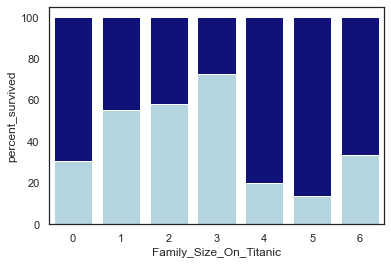

In [39]:
total = df_train_exploration.groupby('Family_Size_On_Titanic')['Survived'].count().reset_index()
survived = df_train_exploration[df_train_exploration['Survived']==1].groupby('Family_Size_On_Titanic')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]
total['percent_survived'] = [i / j * 100 for i,j in zip(total['Survived'], total['Survived'])]

bar1 = sns.barplot(x="Family_Size_On_Titanic",  y="percent_survived", data=total, color='darkblue')
bar2 = sns.barplot(x="Family_Size_On_Titanic", y="percent_survived", data=survived, color='lightblue')

In [40]:
df_train_exploration['Family_Size_On_TitanicBinned'] = pd.cut(df_train_exploration['Family_Size_On_Titanic'], 
                                                              [-1,0,3, 10], 
                                                              labels=['alone', 'smail_family_1-3', 'large_family_over_4']
                                                             )

<AxesSubplot:xlabel='Family_Size_On_TitanicBinned', ylabel='count'>

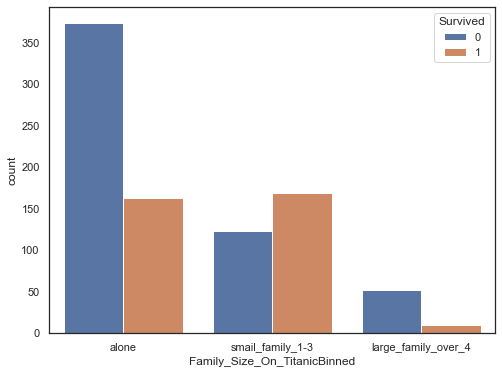

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_Size_On_TitanicBinned', hue='Survived', data=df_train_exploration)

## Name

In [42]:
df_train_exploration['Title']=df_train_exploration['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [43]:
title_list = ['Mr','Mrs','Miss','Master','Rev','Dr']
df_train_exploration['Title'] = df_train_exploration['Title'].apply(lambda x: x if x in title_list else "Other")

<AxesSubplot:xlabel='Title', ylabel='count'>

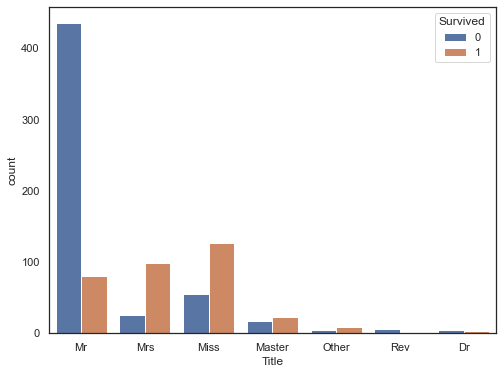

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Title', hue='Survived', data=df_train_exploration)

## Ticket Type

In [45]:
df_train_exploration['Ticket_type'] = df_train_exploration['Ticket'].apply(lambda x: x[0:3])
df_train_exploration['Ticket_type'] = df_train_exploration['Ticket_type'].astype('category')


In [46]:
ticket_list = ['PC','349','347','113','C.A','345','310','350','STO','A/5','SOT','266']
df_train_exploration['Ticket_type'] = df_train_exploration['Ticket_type'].apply(lambda x: x if x in title_list else "Other")

<AxesSubplot:xlabel='Ticket_type', ylabel='count'>

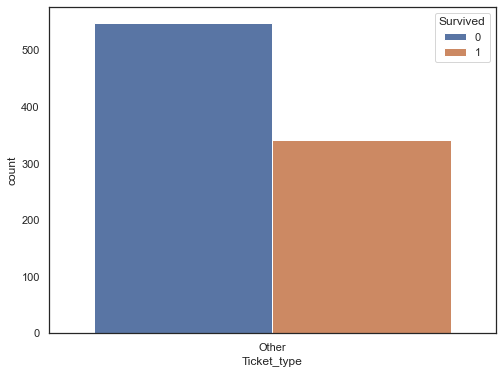

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Ticket_type', hue='Survived', data=df_train_exploration)

## Word Length

In [48]:
df_train_exploration['Words_Count'] = df_train_exploration['Name'].apply(lambda x: len(x.split()))


<AxesSubplot:xlabel='Words_Count', ylabel='count'>

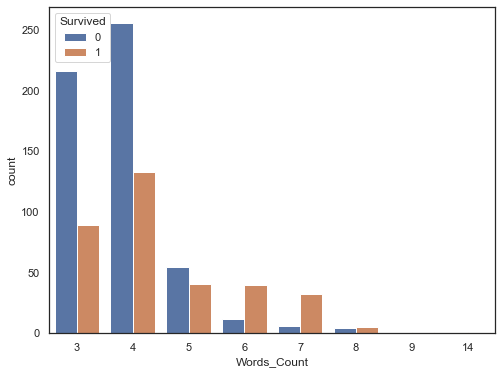

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Words_Count', hue='Survived', data=df_train_exploration)

## Correlation

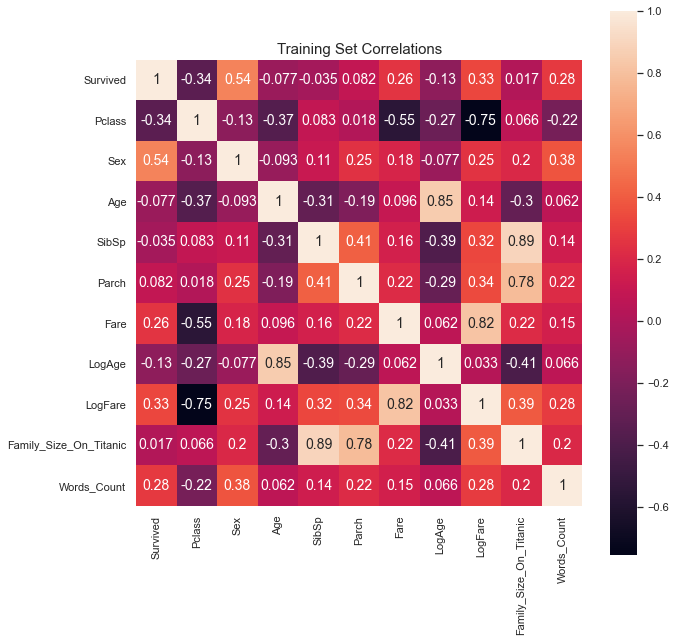

In [50]:
fig, axs = plt.subplots(figsize=(10, 10))

sns.heatmap(df_train_exploration.drop(['PassengerId'], axis=1).corr(), ax=axs, annot=True, square=True, annot_kws={'size': 14})

#axs.tick_params(axis='x', labelsize=14)
#axs.tick_params(axis='y', labelsize=14)
    
axs.set_title('Training Set Correlations', size=15)

plt.show()

# Feature Engineering

In [51]:
def feature_eng(df):    
    #Bin Age and Fare
    df['AgeBinned'] = pd.cut(df['Age'], 
                               [0, 2, 15, 35, 60, 200], 
                               labels=['infant_0-2', 'child_2-15', 'young adult_15-35','adult_35-60','elderly_over_60']
                            )
    df['FareBinned'] = pd.cut(df['Fare'], 
                               [0, 10, 50, 100, 1000], 
                                labels=['fare_0-10', 'fare_10-50', 'fare_50-100','fare_100-1000']
                               )
    # Create Deck Feature from Cabin
    df['Deck']=df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else np.NaN)
    # Create Family Size Feature from SibSp and Parch  
    df['Family_Size_On_Titanic']= df['SibSp'] + df['Parch']
    df['Family_Size_On_Titanic_Binned'] = pd.cut(df['Family_Size_On_Titanic'], 
                                                [-1,0,3, 10], 
                                                labels=['alone', 'small_family_1-3', 'large_family_over_4']
                                               )    
    # Create Title Feature from Name
    title_mapping_list = ['Mr','Mrs','Miss','Master','Rev','Dr']
    df['Title']=df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    df['Title'] = df['Title'].apply(lambda x: x if x in title_list else "Other")
    
    # Create Words Count
    df['Words_Count'] = df['Name'].apply(lambda x: len(x.split()))


    # Create Ticket Type Feature from Ticket
    ticket_list = ['PC','349','347','113','C.A','345','310','350','STO','A/5','SOT','266']
    df['Ticket_type'] = df['Ticket'].apply(lambda x: x[0:3])
    df['Ticket_type'] = df['Ticket_type'].astype('category')
    df['Ticket_type'] = df['Ticket_type'].apply(lambda x: x if x in ticket_list else "Other")

    
    # Drop
    cols_to_drop = ['Name','Ticket', 'Cabin', 'PassengerId','SibSp', 'Parch','Family_Size_On_Titanic']
    df.drop(cols_to_drop, axis=1, inplace = True)


    
    return df

In [52]:
df_train = feature_eng(df_train)

In [53]:
x_test = feature_eng(df_test)

# Pre-Processing

In [54]:
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [55]:
# define transformers
si_0 = SimpleImputer(strategy='mean')
si_1 = SimpleImputer(strategy='constant', fill_value = 'missing')

ss = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# define column groups with same processing
num_vars = ['Sex']
cat_vars = ['AgeBinned','FareBinned','Pclass','Deck',
            'Embarked','Family_Size_On_Titanic_Binned',
            'Title','Words_Count', 'Ticket_type']
# set up pipelines for each column group
numeric_pipe = Pipeline([#('ind', missing_indicator_num) ,
                         ('si_0', si_0), 
                         ('ss', ss)
                        ])
categorical_pipe = Pipeline([
                            ('si_1', si_1),
                            ('ohe', ohe)
                            ])
# set up columnTransformer
col_transformer = ColumnTransformer(
                    transformers=[
                        ('nums', numeric_pipe, num_vars),
                        ('cats', categorical_pipe, cat_vars),                        
                    ],
                    remainder='drop',
                    n_jobs=-1
                    )

In [56]:
features = FeatureUnion([
    ("preprocessing", col_transformer),
])

In [57]:
#x_train = col_transformer.fit_transform(x_train)
#x_val = col_transformer.transform(x_val)
#x_test = col_transformer.transform(x_test)

In [58]:
import sklearn
import warnings

In [59]:
# function source: https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names


# Model

### Train Validate Split

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
X_train, Y_train = df_train.drop('Survived', axis=1), df_train['Survived']
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = .2, random_state = 0)

### Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
classifier_pipeline = Pipeline(steps=[
    ("features", features),
    ("lr", LogisticRegression(
        max_iter=10000,
        n_jobs=-1, verbose=False, 
        random_state=0
    )) 
])

# Declare dynamic parameters here
pipeline_params = {
    "lr__C": [1000, 100, 10, 1, 0.1]
}

In [110]:
search_lr = GridSearchCV(
    classifier_pipeline, pipeline_params, 
    scoring="roc_auc", cv=5, verbose=False
)
search_lr.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('preprocessing',
                                                                        ColumnTransformer(n_jobs=-1,
                                                                                          transformers=[('nums',
                                                                                                         Pipeline(steps=[('si_0',
                                                                                                                          SimpleImputer()),
                                                                                                                         ('ss',
                                                                                                                          StandardScaler())]),
                                                                                     

In [111]:
#sklearn.metrics.SCORERS.keys()

In [119]:
print("Best parameter (ROC AUC score=%0.3f):" % search_lr.best_score_)
print(search_lr.best_params_)

Best parameter (ROC AUC score=0.861):
{'lr__C': 1}


In [113]:
from sklearn.metrics import accuracy_score

In [114]:
search_lr.predict_proba(x_val)
train_score = accuracy_score(y_train, search_lr.predict(x_train))
valid_score = accuracy_score(y_val, search_lr.predict(x_val))
print(f"Train's accuracy: {train_score}")
print(f"Valid's accuracy: {valid_score}")


Train's accuracy: 0.8398876404494382
Valid's accuracy: 0.8156424581005587


In [115]:
print(classification_report(y_train, search_lr.predict(x_train)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       439
           1       0.82      0.75      0.78       273

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



In [116]:
print(classification_report(y_val, search_lr.predict(x_val)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [117]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": search_lr.predict(x_test)
})
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [118]:
submission.to_csv("submission_lr.csv", index=False)

### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
classifier_pipeline = Pipeline(steps=[
    ("features", features),
    ("rfc", RandomForestClassifier(random_state=0)) 
])

# Declare dynamic parameters here
pipeline_params = {
    'rfc__max_depth': [3,5,7,9,11],
    'rfc__max_features':["sqrt", "log2"],
    'rfc__max_leaf_nodes': [6,8,10],
}

In [148]:
search_rf = GridSearchCV(
    classifier_pipeline, pipeline_params, 
    scoring="roc_auc", cv=10, n_jobs=-1,verbose=False
)
search_rf.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('preprocessing',
                                                                        ColumnTransformer(n_jobs=-1,
                                                                                          transformers=[('nums',
                                                                                                         Pipeline(steps=[('si_0',
                                                                                                                          SimpleImputer()),
                                                                                                                         ('ss',
                                                                                                                          StandardScaler())]),
                                                                                    

In [149]:
print("Best parameter (ROC AUC score=%0.3f):" % search_rf.best_score_)
print(search_rf.best_params_)

Best parameter (ROC AUC score=0.859):
{'rfc__max_depth': 9, 'rfc__max_features': 'sqrt', 'rfc__max_leaf_nodes': 10}


In [150]:
search_rf.predict_proba(x_val)
train_score = accuracy_score(y_train, search_rf.predict(x_train))
valid_score = accuracy_score(y_val, search_rf.predict(x_val))
print(f"Train's accuracy: {train_score}")
print(f"Valid's accuracy: {valid_score}")

Train's accuracy: 0.8314606741573034
Valid's accuracy: 0.8100558659217877


In [151]:
print(classification_report(y_train, search_rf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       439
           1       0.82      0.71      0.76       273

    accuracy                           0.83       712
   macro avg       0.83      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712



In [152]:
print(classification_report(y_val, search_rf.predict(x_val)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [153]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": search_rf.predict(x_test)
})
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [154]:
submission.to_csv("submission_randomforest.csv", index=False)

### XGBoost


In [125]:
from xgboost import XGBClassifier

In [126]:
classifier_pipeline = Pipeline(steps=[
    ("features", features),
    ("xgb", XGBClassifier(objective= 'binary:logistic',
                          eval_metric='aucpr',
                          random_state=0)) 
])

# Declare dynamic parameters here
pipeline_params = {
    'xgb__n_estimators': [10, 50,100,1000],
    'xgb__max_depth': [3, 5, 9],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__early_stopping_rounds': [3, 5, 10, 15],    
}

In [127]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [128]:
search_xgb = GridSearchCV(
    classifier_pipeline, pipeline_params, 
    scoring="accuracy", cv=5, n_jobs=-1,verbose=False
)
search_xgb.fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:26:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('preprocessing',
                                                                        ColumnTransformer(n_jobs=-1,
                                                                                          transformers=[('nums',
                                                                                                         Pipeline(steps=[('si_0',
                                                                                                                          SimpleImputer()),
                                                                                                                         ('ss',
                                                                                                                          StandardScaler())]),
                                                                                     

In [129]:
print("Best parameter (roc_auc=%0.3f):" % search_xgb.best_score_)
print(search_xgb.best_params_)

Best parameter (roc_auc=0.829):
{'xgb__early_stopping_rounds': 3, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}


In [130]:
search_xgb.predict_proba(x_val)
train_score = accuracy_score(y_train, search_xgb.predict(x_train))
valid_score = accuracy_score(y_val, search_xgb.predict(x_val))
print(f"Train's accuracy: {train_score}")
print(f"Valid's accuracy: {valid_score}")

Train's accuracy: 0.8595505617977528
Valid's accuracy: 0.8044692737430168


In [131]:
print(classification_report(y_train, search_xgb.predict(x_train)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       439
           1       0.84      0.78      0.81       273

    accuracy                           0.86       712
   macro avg       0.86      0.84      0.85       712
weighted avg       0.86      0.86      0.86       712



In [132]:
print(classification_report(y_val, search_xgb.predict(x_val)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [133]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": search_xgb.predict(x_test)
})
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [134]:
submission.to_csv("submission_xgboost.csv", index=False)